In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)  # please do not remove this line

def load_data_from_file(fileName="advertising.csv"):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
    features_X = data[:, :3]
    features_X = np.hstack((np.ones((len(data), 1)), features_X))
    sales_Y = data[:, 3]
    return features_X, sales_Y

In [2]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [3]:
# Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [4]:
# Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [5]:
# BÀI TẬP 2
def create_individual ( n =4 , bound =10) :
    individual = [random.uniform(-bound/2, bound/2) for _ in range(n)]

    return individual

individual = create_individual()
print ( individual )

[3.4442185152504816, 2.5795440294030243, -0.79428419169155, -2.4108324970703663]


In [6]:
# BÀI TẬP 3
features_X, sales_Y = load_data_from_file()

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1/(loss+1)
    
    return fitness_value


In [7]:
# Question 4
features_X , sales_Y = load_data_from_file()
individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [8]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(len(individual1_new)):
        if random.random() < crossover_rate:
                individual1_new[i], individual2_new[i] = individual2_new[i], individual1_new[i]
    return individual1_new, individual2_new


In [9]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover( individual1 , individual2 , 0.2)
print (" individual1 : " , individual1 )
print (" individual2 : " , individual2 )

 individual1 :  [3.44, 2.57, -0.79, -2.41]
 individual2 :  [4.09, 4.82, 3.1, 4.02]


In [10]:
def mutate(individual , mutation_rate = 0.05) :
    individual_m = individual.copy()
    for i in range(len(individual_m)):
        if random.random() > mutation_rate:
            individual_m[i] = random.uniform(-5,5)
    return individual_m

In [11]:
# Question 6:
before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)


True


In [12]:
# Bài tập 6
def initializePopulation(m) :
    population = [ create_individual() for _ in range ( m ) ]
    return population

In [13]:
print(initializePopulation(8))

[[-2.1816215560029617, 2.5580420415722394, 1.1836899667533167, -2.4949365863755943], [4.097462559682402, 4.827854760376532, 3.102172359965895, 4.021659504395828], [-1.8985243068066735, 2.298317482601286, 3.9883828796799357, 1.8398393191544127], [-0.2785728454728664, -3.992987919316342, -0.6582816454621634, 1.1088697344380165], [4.130110532378982, 4.666063677707587, -0.22990223447282965, 3.6530992777164], [-2.395076896080406, 3.0502782701302227, 0.4869930383558927, -4.8595829983598104], [2.1970468640395415, -1.0117645777573125, 3.2484497714823295, 1.6815320123185087], [-4.988571806855717, -0.06422133534675378, 3.6760277549278086, -2.5608912311286804]]


In [14]:
# BÀI TẬP 7
def selection(sorted_old_population, m = 100) :
    index1 = random.randint(0, m -1)
    while True :
        index2 = random.randint (0 , m -1)
        if (index2!=index1):
            break
    individual_s = sorted_old_population[index1]
    if index2 > index1 :
        individual_s = sorted_old_population[index2]
    return individual_s

In [15]:
# Bài tập 8
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)
    
    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[m - 1]), "with chromosome:", sorted_population[m - 1])
    
    new_population = []
    
    while len(new_population) < m - elitism:
        # selection
        # **************** your code here ****************
        individual_1 = selection(sorted_population, m)
        individual_2 = selection(sorted_population, m)
        
        # crossover
        # **************** your code here ****************
        individual_1, individual_2 = crossover(individual_1, individual_2, crossover_rate=0.9)
        # mutation
        # **************** your code here ****************
        individual_1 = mutate(individual_1)
        individual_2 = mutate(individual_2)

        new_population.append(individual_1)
        new_population.append(individual_2)

    # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m - elitism:]:
        # **************** your code here ****************
        new_population.append(ind)
    
    return new_population, compute_loss(sorted_population[m - 1])


In [16]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population ( old_population , elitism =2 , gen =1)

Best loss: 123415.051528805 with chromosome: [3.44, 2.57, -0.79, -2.41]


In [37]:
#Bài Tập 9

def run_GA():
    n_generations = 150
    m = 600
    features_X , sales_Y = load_data_from_file ()
    population = initializePopulation(m)
    losses_list = []
    for i in range (n_generations) :
        population, loss = create_new_population ( population , elitism =2 , gen =1)
        losses_list.append(loss)
    return losses_list, population

Best loss: 691.3696926531867 with chromosome: [-4.757739975955936, 0.2662499637540483, -1.2950532111673807, 0.2562894184784188]
Best loss: 313.73826948537885 with chromosome: [-3.360016465747254, 0.2076735017325202, -0.660851932920675, 0.2834555562000354]
Best loss: 313.73826948537885 with chromosome: [-3.360016465747254, 0.2076735017325202, -0.660851932920675, 0.2834555562000354]
Best loss: 313.73826948537885 with chromosome: [-3.360016465747254, 0.2076735017325202, -0.660851932920675, 0.2834555562000354]
Best loss: 313.73826948537885 with chromosome: [-3.360016465747254, 0.2076735017325202, -0.660851932920675, 0.2834555562000354]
Best loss: 313.73826948537885 with chromosome: [-3.360016465747254, 0.2076735017325202, -0.660851932920675, 0.2834555562000354]
Best loss: 313.73826948537885 with chromosome: [-3.360016465747254, 0.2076735017325202, -0.660851932920675, 0.2834555562000354]
Best loss: 313.73826948537885 with chromosome: [-3.360016465747254, 0.2076735017325202, -0.6608519329206

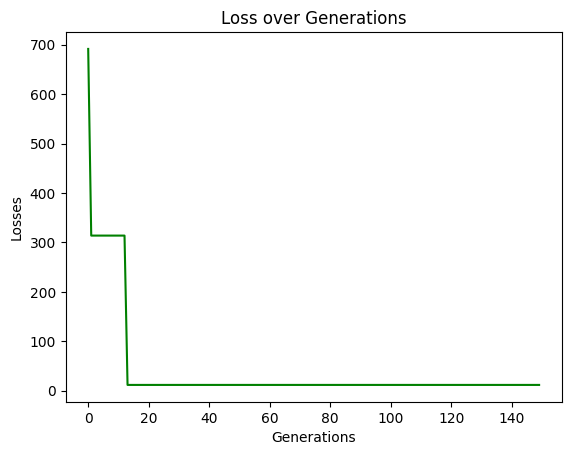

In [38]:
import matplotlib . pyplot as plt
import matplotlib . pyplot as plt
def visualize_loss ( losses_list ) :
# *********** your code here *************
    plt.plot(range(len(losses_list)), losses_list, color='green')
    plt.xlabel('Generations')
    plt.ylabel('Losses')
    plt.title('Loss over Generations')
    plt.show()
losses_list, _ = run_GA()
visualize_loss( losses_list )

Best loss: 1895.936912073865 with chromosome: [-3.7659883583664957, -0.29374658792170116, 0.42956924141303254, 1.3796427155108235]
Best loss: 1153.5681402174678 with chromosome: [3.9314544125651167, 0.31562010880108105, -0.4636709181646683, -1.010680321488139]
Best loss: 1071.7747768025629 with chromosome: [1.5313825097499487, 0.36248354667603255, -0.8423298683010234, -0.2694461773462651]
Best loss: 106.03346058978566 with chromosome: [2.9828879770552996, -0.02778631442379975, 0.40260164245404617, 0.027786368345227075]
Best loss: 106.03346058978566 with chromosome: [2.9828879770552996, -0.02778631442379975, 0.40260164245404617, 0.027786368345227075]
Best loss: 106.03346058978566 with chromosome: [2.9828879770552996, -0.02778631442379975, 0.40260164245404617, 0.027786368345227075]
Best loss: 106.03346058978566 with chromosome: [2.9828879770552996, -0.02778631442379975, 0.40260164245404617, 0.027786368345227075]
Best loss: 106.03346058978566 with chromosome: [2.9828879770552996, -0.02778

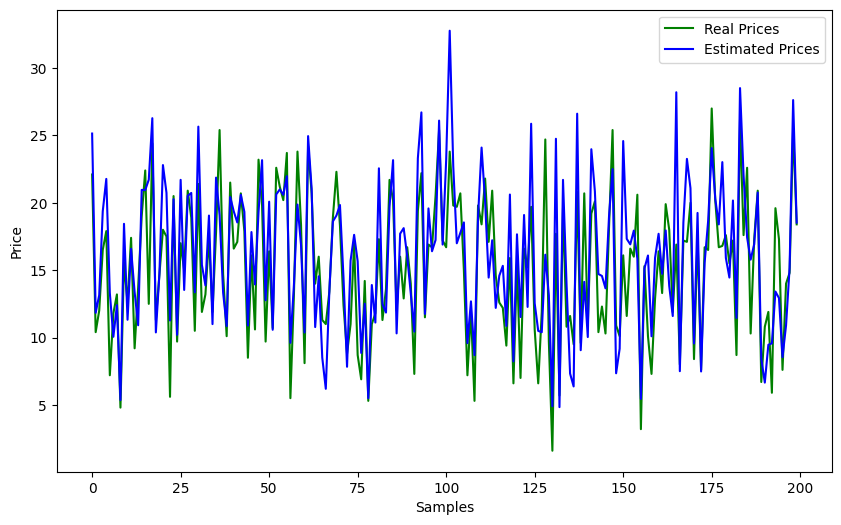

In [40]:
def visualize_predict_gt():
    # Visualization of ground truth and predicted values
    losses_list, population = run_GA()
    sorted_population = sorted(population, key=compute_fitness)
    print("Best chromosome:", sorted_population[-1])
    theta = np.array(sorted_population[-1])
    
    # Tính toán estimated_prices dựa trên theta
    estimated_prices = [np.dot(feature, theta) for feature in features_X]
    
    # Vẽ đồ thị
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, color='green', label='Real Prices')
    plt.plot(estimated_prices, color='blue', label='Estimated Prices')
    plt.legend()
    plt.show()

# Gọi hàm để hiển thị đồ thị
visualize_predict_gt()
